In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats

In [29]:
mereni = np.loadtxt('sada_422944_50ks.txt') #moje data, upraveno bez x,y / nechtelo se otevrit najednou...

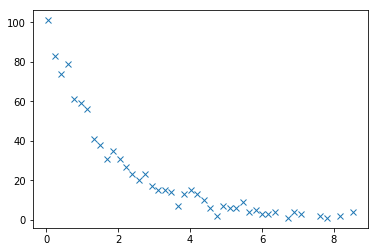

In [30]:
plt.plot(x, y, 'x') #jaktoze zmena na primku, kdyz exponenciala?/opet zmena na exponencialu..? mam spatne [poradi prikazu pre pak jede]

In [31]:
lny=np.log(y) #hlaska = pro funkci vyhodit nuly (log v nule nedefinovan)

In [32]:
pole = []
for x in mereni: #prejmenovat data, jinak nefunguje pro x,y / musi se zrusit, chybove hlasky
    if x[1] !=0:
        pole.append(x)
pole=np.array(pole)
x,y=data=np.transpose(pole) #plete si s temito hodnotami / oprava

In [33]:
mat_M=np.array([np.ones(len(x)), (-x)]).T #modelova matice - jak by to melo vypadat / opraveno na zlogaritmovany vztah / vyhneme se exponenciale
mat_M

array([[ 1.  , -0.06],
       [ 1.  , -0.24],
       [ 1.  , -0.42],
       [ 1.  , -0.6 ],
       [ 1.  , -0.78],
       [ 1.  , -0.96],
       [ 1.  , -1.14],
       [ 1.  , -1.32],
       [ 1.  , -1.5 ],
       [ 1.  , -1.68],
       [ 1.  , -1.86],
       [ 1.  , -2.04],
       [ 1.  , -2.22],
       [ 1.  , -2.4 ],
       [ 1.  , -2.58],
       [ 1.  , -2.76],
       [ 1.  , -2.94],
       [ 1.  , -3.12],
       [ 1.  , -3.3 ],
       [ 1.  , -3.48],
       [ 1.  , -3.66],
       [ 1.  , -3.84],
       [ 1.  , -4.02],
       [ 1.  , -4.2 ],
       [ 1.  , -4.38],
       [ 1.  , -4.56],
       [ 1.  , -4.74],
       [ 1.  , -4.92],
       [ 1.  , -5.1 ],
       [ 1.  , -5.28],
       [ 1.  , -5.46],
       [ 1.  , -5.64],
       [ 1.  , -5.82],
       [ 1.  , -6.  ],
       [ 1.  , -6.18],
       [ 1.  , -6.36],
       [ 1.  , -6.72],
       [ 1.  , -6.9 ],
       [ 1.  , -7.08],
       [ 1.  , -7.62],
       [ 1.  , -7.8 ],
       [ 1.  , -8.16],
       [ 1.  , -8.52]])

In [34]:
hessian=mat_M.T.dot(mat_M)

In [35]:
hessian

array([[  43.    , -168.36  ],
       [-168.36  ,  897.7968]])

In [36]:
covar=np.linalg.inv(hessian) #kovariancni matice
covar

array([[ 0.08750309,  0.01640908],
       [ 0.01640908,  0.00419096]])

In [37]:
pars1=covar.dot(mat_M.T.dot(lny))
pars1

array([ 4.40190005,  0.49893267])

In [38]:
A=np.exp(pars1[0])
l=pars1[1]
A,l #spocitane hodnoty parametru

(81.605776568261547, 0.49893267232038507)

In [39]:
ymodel=mat_M.dot(pars1) #modelova matice - teoreticky prubeh mereni

In [40]:
#def f(x, A, l):
 #   return (A)*(-x*l) #mereni casove zavislosti signalu detektoru castic y=A exp(-tl)

In [41]:
#popt, pcov = scipy.optimize.curve_fit(f, x, y)

In [42]:
#popt

In [43]:
#pcov

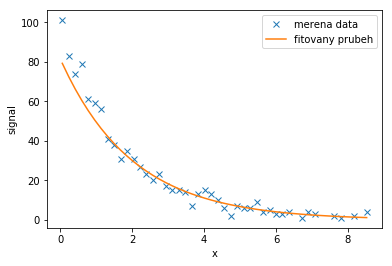

In [44]:
plt.plot(x, y, 'x', label='merena data')
#plt.plot(x, ymodel, label="simulovany prubeh")
plt.plot(x, A*np.exp(-x*l), label='fitovany prubeh')
plt.xlabel('x')
plt.ylabel('signal')
plt.legend(loc=0)

In [45]:
#plt.plot(x, ymodel-popt[0]*np.exp(-x*popt[1])) #odchylka praveho prubehu od simulace

In [46]:
#suma rezidui
s0=sum((lny-(pars1-x*pars1[1]))**2)
rs0=s0/(len(x)-2) #2 urcovane parametry
#print("reduk. chi^2: %.2f vs. skutecna sigma^2: %.2f"%(rs0,sigma**2)) nemam uz sigmu

ValueError: operands could not be broadcast together with shapes (2,) (43,) 

In [ ]:
errs=np.sqrt(covar.diagonal())
corel=covar/errs.reshape(1,2)/errs.reshape(2,1)
print("korelacni matice parametru")
corel

In [ ]:
errs*=np.sqrt(rs0)
print("nejistoty parametru:"+str(errs))

In [47]:
y2=np.random.poisson(ymodel) #nekonstantni nejistoty
mat_W=np.array([np.ones(len(x)), (-x)]).T #vahova matice jako inverze kovarianci merenych hodnot 
hessian2=mat_M.T.dot(mat_W.dot(mat_M))
covar2=np.linalg.inv(hessian2)

pars2=covar2.dot(mat_M.T.dot(mat_W.dot(y2)))
ymodel2=mat_M.dot(pars2)
plt.plot(x,ymodel2,'r',label="fitovany. prubeh")
plt.plot(x,y2,"v",label="mereni")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
pars2

ValueError: shapes (43,2) and (43,2) not aligned: 2 (dim 1) != 43 (dim 0)

In [48]:
s02=sum((y2-ymodel2)**2)
rs02=s02/(len(x)-2) #2 urcovane parametry
print("reduk. chi^2: %.2f vs. \"prumerna\" sigma^2: %.2f (%.2f)"%(rs02,y2.mean(),(np.sqrt(y2).mean())**2))

NameError: name 'ymodel2' is not defined

In [49]:
s02m=(y2-ymodel2).T.dot(mat_W.dot(y2-ymodel2))
rs02m=s02m/(len(x)-2)
rs02m

NameError: name 'ymodel2' is not defined

In [50]:
errs2=np.sqrt(covar2.diagonal())
corel2=covar2/errs2.reshape(1,2)/errs2.reshape(2,1)
print("nejistoty parametru:"+str(errs2))
print("korelacni matice parametru")
corel2

NameError: name 'covar2' is not defined

In [51]:
xbins=np.r_[-15:15:2]
ok1=plt.hist(popt[0]*np.exp(-x*popt[1])-ymodel,xbins,alpha=0.5,label="konst.sigma")
plt.legend(loc=0)

NameError: name 'popt' is not defined

In [52]:
def moments(meas):
    cmeas = meas-meas.mean()
    return (cmeas**2).mean(), (cmeas**3).mean(),(cmeas**4).mean()
moms1 = moments((([np.ones(len(x)), (-x)]).T )-ymodel)
skew1,curt1 = moms1[1]/moms1[0]**1.5,moms1[2]/moms1[0]**2-3
skew1,curt1

AttributeError: 'list' object has no attribute 'T'

In [53]:
scipy.stats.kurtosis(([np.ones(len(x)), (-x)]).T ) 

AttributeError: 'list' object has no attribute 'T'

In [54]:
scipy.stats.skew(([np.ones(len(x)), (-x)]).T )

AttributeError: 'list' object has no attribute 'T'